# Théorème de Perron Frobenius

**Question** Créer les deux graphes suivants et désigner leurs matrices d'adjacence (symmétrique) `A_irr`pour le graphe à 5 noeuds et `A_prim` pour l'autre. 

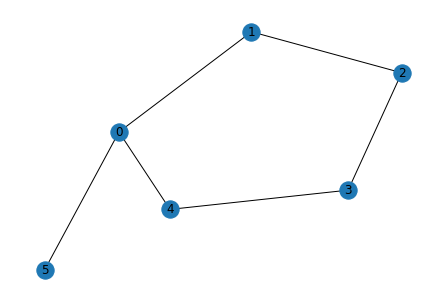

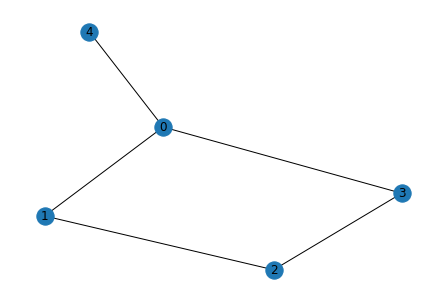

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
edge_list_irr = [(0,1), (1, 2), (2, 3), (3, 0), (0, 4)]
edge_list_prim = [(0,1), (0, 4), (0, 5), (1, 2), (2, 3), (3, 4)] 

In [3]:
G_u_irr = nx.Graph(edge_list_irr)
G_u_prim = nx.Graph(edge_list_prim)

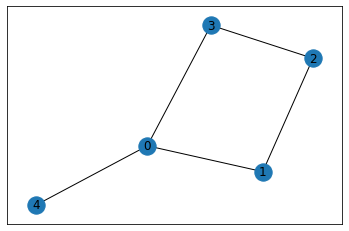

In [4]:
nx.draw_networkx(G_u_irr, with_labels=True)

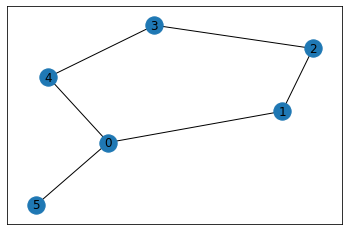

In [5]:
nx.draw_networkx(G_u_prim, with_labels=True)

In [6]:
A_irr = nx.linalg.adjacency_matrix(G_u_irr).todense()
A_irr

matrix([[0, 1, 0, 1, 1],
        [1, 0, 1, 0, 0],
        [0, 1, 0, 1, 0],
        [1, 0, 1, 0, 0],
        [1, 0, 0, 0, 0]], dtype=int64)

In [7]:
A_prim = nx.linalg.adjacency_matrix(G_u_prim).todense()
A_prim

matrix([[0, 1, 1, 1, 0, 0],
        [1, 0, 0, 0, 1, 0],
        [1, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 1],
        [0, 0, 1, 0, 1, 0]], dtype=int64)

# Marche dans le graphe

**Question** Créer un vecteur pour signifier qu'on démarre dans le noeud 1. Appliquer les transitions sur des marches de longueur 3 avec les 2 graphes. 

In [8]:
v_deb_irr = A_irr[0]
v_deb_prim = A_prim[0]

In [9]:
v_deb_irr @ A_irr @ A_irr @ A_irr

matrix([[13,  0, 10,  0,  0]], dtype=int64)

In [10]:
v_deb_prim @ A_prim @ A_prim @ A_prim

matrix([[11,  1,  1,  0,  5,  5]], dtype=int64)

# Spectre

**Question** Calculer les décompositions spectrales des deux graphes. Afficher les vecteurs et valeurs propres.

In [11]:
e_vals_irr, e_vecs_irr = np.linalg.eig(A_irr)
print("e_vals_irr", e_vals_irr)
print("e_vecs_irr", e_vecs_irr)

e_vals_irr [-2.13577921  2.13577921 -0.66215345  0.66215345  0.        ]
e_vecs_irr [[ 5.57345410e-01 -5.57345410e-01  4.35162146e-01  4.35162146e-01
  -5.88884451e-33]
 [-4.64705132e-01 -4.64705132e-01  1.84524092e-01 -1.84524092e-01
  -7.07106781e-01]
 [ 4.35162146e-01 -4.35162146e-01 -5.57345410e-01 -5.57345410e-01
   5.08182678e-32]
 [-4.64705132e-01 -4.64705132e-01  1.84524092e-01 -1.84524092e-01
   7.07106781e-01]
 [-2.60956474e-01 -2.60956474e-01 -6.57192300e-01  6.57192300e-01
   3.05594581e-17]]


In [12]:
e_vals_prim, e_vecs_prim = np.linalg.eig(A_prim)
print("e_vals_prim", e_vals_prim)
print("e_vecs_prim", e_vecs_prim)

e_vals_prim [ 2.11490754 -1.86080585 -0.25410169  1.          0.61803399 -1.61803399]
e_vecs_prim [[-5.22966014e-01 -6.63504341e-01  1.90443004e-01 -5.00000000e-01
  -3.80419764e-17  2.39102220e-17]
 [-4.29374351e-01  4.39042241e-01  3.50541834e-01 -1.14209076e-16
   6.01500955e-01 -3.71748034e-01]
 [-4.29374351e-01  4.39042241e-01  3.50541834e-01  3.16002353e-16
  -6.01500955e-01  3.71748034e-01]
 [-2.47276065e-01  3.56568279e-01 -7.49475557e-01 -5.00000000e-01
  -1.40455523e-17 -4.20740372e-17]
 [-3.85121039e-01 -1.53468031e-01 -2.79516276e-01  5.00000000e-01
   3.71748034e-01  6.01500955e-01]
 [-3.85121039e-01 -1.53468031e-01 -2.79516276e-01  5.00000000e-01
  -3.71748034e-01 -6.01500955e-01]]


**Question** Vérifier que $Av = \lambda v$ pour le premier couple valeur et vecteur propre, et les autres...

In [13]:
A_irr @ e_vecs_irr[:,0]

matrix([[-1.19036674],
        [ 0.99250756],
        [-0.92941026],
        [ 0.99250756],
        [ 0.55734541]])

In [14]:
e_vals_irr[0] * e_vecs_irr[:,0]

matrix([[-1.19036674],
        [ 0.99250756],
        [-0.92941026],
        [ 0.99250756],
        [ 0.55734541]])

# A_irr est irréductible mais pas primitive

**Question** Vérifier que `A_irr` n'est pas primitive mais que `A_prim` l'est.

In [15]:
A_irr

matrix([[0, 1, 0, 1, 1],
        [1, 0, 1, 0, 0],
        [0, 1, 0, 1, 0],
        [1, 0, 1, 0, 0],
        [1, 0, 0, 0, 0]], dtype=int64)

In [16]:
A_irr @ A_irr

matrix([[3, 0, 2, 0, 0],
        [0, 2, 0, 2, 1],
        [2, 0, 2, 0, 0],
        [0, 2, 0, 2, 1],
        [0, 1, 0, 1, 1]], dtype=int64)

In [17]:
A_irr @ A_irr @ A_irr

matrix([[0, 5, 0, 5, 3],
        [5, 0, 4, 0, 0],
        [0, 4, 0, 4, 2],
        [5, 0, 4, 0, 0],
        [3, 0, 2, 0, 0]], dtype=int64)

In [18]:
A_irr @ A_irr @ A_irr @ A_irr

matrix([[13,  0, 10,  0,  0],
        [ 0,  9,  0,  9,  5],
        [10,  0,  8,  0,  0],
        [ 0,  9,  0,  9,  5],
        [ 0,  5,  0,  5,  3]], dtype=int64)

In [19]:
A_irr @ A_irr @ A_irr @ A_irr @ A_irr

matrix([[ 0, 23,  0, 23, 13],
        [23,  0, 18,  0,  0],
        [ 0, 18,  0, 18, 10],
        [23,  0, 18,  0,  0],
        [13,  0, 10,  0,  0]], dtype=int64)

In [20]:
A_prim @ A_prim

matrix([[3, 0, 0, 0, 1, 1],
        [0, 2, 1, 1, 0, 1],
        [0, 1, 2, 1, 1, 0],
        [0, 1, 1, 1, 0, 0],
        [1, 0, 1, 0, 2, 0],
        [1, 1, 0, 0, 0, 2]], dtype=int64)

In [21]:
A_prim @ A_prim @ A_prim

matrix([[0, 4, 4, 3, 1, 1],
        [4, 0, 1, 0, 3, 1],
        [4, 1, 0, 0, 1, 3],
        [3, 0, 0, 0, 1, 1],
        [1, 3, 1, 1, 0, 3],
        [1, 1, 3, 1, 3, 0]], dtype=int64)

In [22]:
A_prim @ A_prim @ A_prim @ A_prim

matrix([[11,  1,  1,  0,  5,  5],
        [ 1,  7,  5,  4,  1,  4],
        [ 1,  5,  7,  4,  4,  1],
        [ 0,  4,  4,  3,  1,  1],
        [ 5,  1,  4,  1,  6,  1],
        [ 5,  4,  1,  1,  1,  6]], dtype=int64)

In [23]:
A_prim @ A_prim @ A_prim @ A_prim @ A_prim

matrix([[ 2, 16, 16, 11,  6,  6],
        [16,  2,  5,  1, 11,  6],
        [16,  5,  2,  1,  6, 11],
        [11,  1,  1,  0,  5,  5],
        [ 6, 11,  6,  5,  2, 10],
        [ 6,  6, 11,  5, 10,  2]], dtype=int64)

In [24]:
A_prim @ A_prim @ A_prim @ A_prim @ A_prim @ A_prim

matrix([[43,  8,  8,  2, 22, 22],
        [ 8, 27, 22, 16,  8, 16],
        [ 8, 22, 27, 16, 16,  8],
        [ 2, 16, 16, 11,  6,  6],
        [22,  8, 16,  6, 21,  8],
        [22, 16,  8,  6,  8, 21]], dtype=int64)

# Rayon spectral

**Question** Calculer le rayon spectral des deux graphes

In [25]:
rs_prim = np.max(np.abs(e_vals_prim))
rs_irr = np.max(np.abs(e_vals_irr))
rs_prim, rs_irr

(2.1149075414767555, 2.1357792050698556)

**Question** La valeur propre maximale en valeur absolue est-elle unique dans les 2 cas ?

In [26]:
print(np.abs(e_vals_prim))
print(np.abs(e_vals_irr))

[2.11490754 1.86080585 0.25410169 1.         0.61803399 1.61803399]
[2.13577921 2.13577921 0.66215345 0.66215345 0.        ]


**Question** Pour la matrice primitive, calculer le vecteur  de Perron-Frobenius, ie le vecteur associé à cette valeur propre maximale et normalisé.

In [44]:
x_plus_prim_pos = np.argmax(np.abs(e_vals_prim))
x_plus_prim = e_vecs_prim[x_plus_prim_pos]
x_plus_prim_norm = np.linalg.norm(x_plus_prim)
x_plus_prim_norm

1.0000000000000004

In [42]:
x_plus_prim @ A_prim

matrix([[-0.97306134, -0.52296601, -0.52296601, -0.52296601, -0.66350434,
          0.190443  ]])

In [40]:
x_plus_prim * rs_prim

matrix([[-1.10602477e+00, -1.40325033e+00,  4.02769346e-01,
         -1.05745377e+00, -8.04552628e-17,  5.05679087e-17]])

**Question** Vérifier que ce vecteur correspond bien à un vecteur propre de valeur propre ce rayon spectral comme indiqué dans le théorème.

**Question** Pour la matrice irreductible, calculer les vecteurs propres correspondant au rayon spectral normalisés (la norme 1 doit être égale à 1). Est-ce que ce sont des vecteurs positifs?  Calculer ensuite les vecteurs dont les composantes sont les valeurs absolues de ces vecteurs. Est-ce unique ? Est-ce un vecteur propre ? 

# Matrices stochastiques

Chaque ligne est un vecteur de probabilité. $P_{ij}$ est la probabilité d'aller en $j$ si on est en $i$, $P(X_{n+1}=j\mid X_n = i)$. Donc chaque ligne somme à 1.

**Question** Calculer les matrices stochastiques associées aux matrices précédentes.

**Question** Vérifier que les lignes somment à 1

**Attention** : la matrice n'est plus symétrique. Si on est en $i$ avec une certaine probabilité $p_i$ alors arriver en $j$ sera $p_i\times P_{ij}$. Donc si on a un vecteur $p$ qui donne les probabilités d'être dans chacun des noeuds, la probabilité d'aller dans $j$ sera $\sum_i p_i \times P_{ij}$, c'est à dire la $p^\top P_{:j}$.

On va chercher la probabilité stationnaire $\pi$ qui vérifie $\pi_j = \sum_i \pi_i \times P_{ij}$, c'est-à-dire $\pi^\top P=\pi^\top$. On va appliquer le théorème de Perron-Frobenius. Avec cette organisation de la matrice et des produits, c'est sur la matrice transposée qu'il faut travailler la décomposition spectrale...

**Question** Calculer leur décomposition spectrale et vérifier s'il n'y a qu'une valeur propre maximale en valeur absolue... Quel est le rayon spectral ? 

Le rayon spectral est 1 dans les 2 cas.

**Question** Calculer le vecteur de probabilités associé : on prend les valeurs absolues et on normalise par la norme 1. 

**Question** Vérifier que l'on a bien l'égalité donnée dans le théorème et donc on a bien trouvé ce vecteur de Perron-Frobenius.

# Avec les itérés de P

**Question** Calculer $P^{50}$, $P^{51}$, $P^{52}$ et pour les matrices stochastiques $P$ associées aux deux graphes. Appelez `M` les matrices $P^{50}$.

**Question** Que constatez-vous?

*Réponse* : On converge avec la matrice primitive, mais on alterne avec l'autre.

**Question** Vérifier que si on applique le M associé à la matrice primitive sur un vecteur de proba initiale aléatoire, on retrouve le vecteur de Perron, la distribution stationnaire.

Si P est irreductible, on recommence la même chose... Itération 50 fois dans RP

**Question** Pour la matrice irreductible, vérifier qu'on a tout de même la convergence en moyenne : la somme des premiers itérés divisée par le nombre d'itérations.

**Question** Transformez la matrice irrégulière avec un damping factor de .85. Vérifiez que la matrice est primitive...